

# Part 1


Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Kmeans

### Data



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


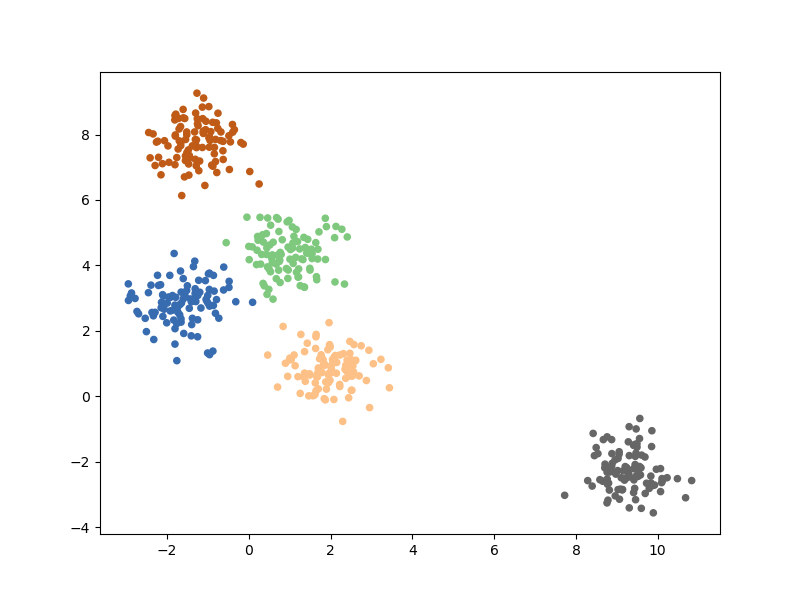

In [3]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Accent(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    


###  Complete linkage




In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
complete_model = AgglomerativeClustering(n_clusters=5, linkage= 'complete')
predicted = complete_model.fit_predict(X)

<IPython.core.display.Javascript object>


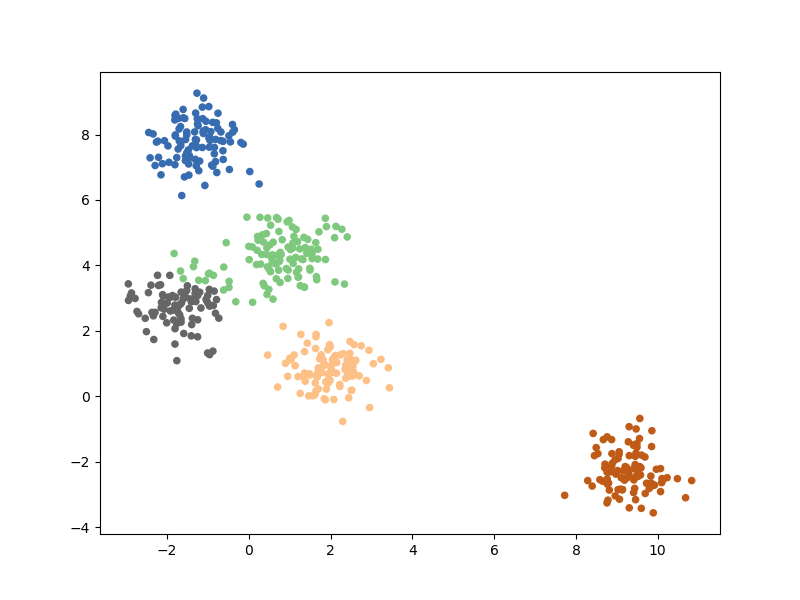

In [6]:
colors = np.array([plt.cm.Accent(val)
          for val in np.linspace(0, 1, complete_model.n_clusters)])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c = colors[predicted], s = 20) 


###  Single linkage




In [7]:
complete_model = AgglomerativeClustering(n_clusters=5, linkage= 'single')
predicted = complete_model.fit_predict(X)

<IPython.core.display.Javascript object>


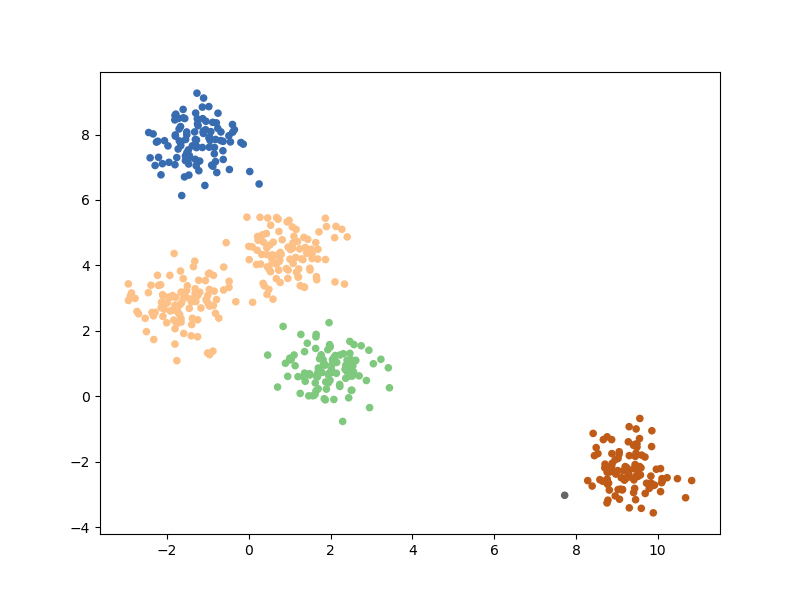

In [8]:
colors = np.array([plt.cm.Accent(val)
          for val in np.linspace(0, 1, complete_model.n_clusters)])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c = colors[predicted], s = 20) 


###  DBSCAN


In [9]:
from sklearn.cluster import DBSCAN

<IPython.core.display.Javascript object>


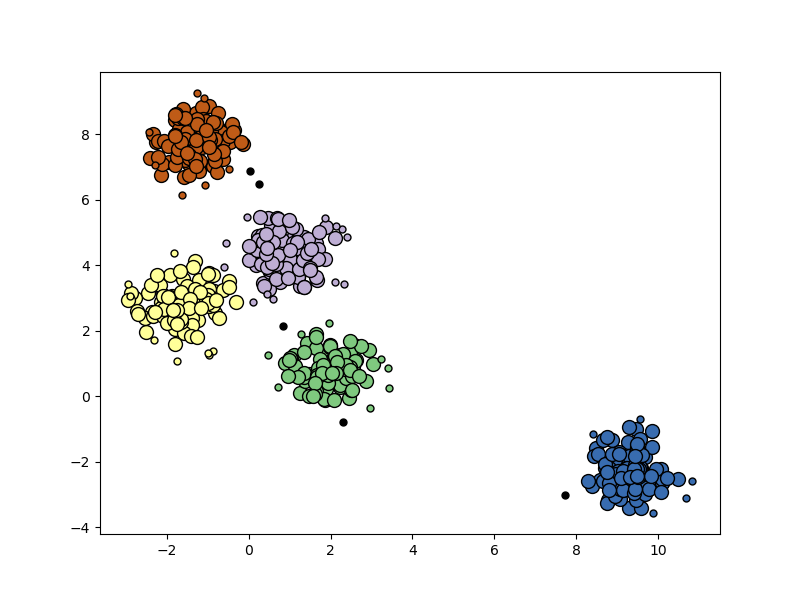

In [10]:
db_model = DBSCAN(eps=0.7, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db_model.labels_, dtype=bool)
core_samples_mask[db_model.core_sample_indices_] = True
labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)

colors = [plt.cm.Accent(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8,6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = (0, 0, 0, 1)
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', c = col, markeredgecolor='k', markersize=20)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', c = col, markeredgecolor='k', markersize=10)


###  k-means



In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans_model = KMeans(n_clusters=5) 
kmeans_model.fit(X)
predicted = kmeans_model.predict(X)

<IPython.core.display.Javascript object>


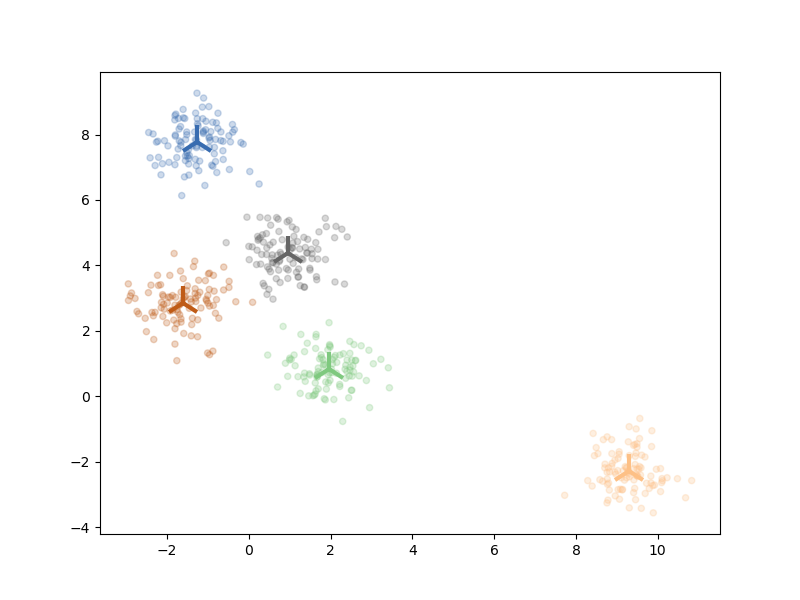

In [13]:
colors = np.array([plt.cm.Accent(val)
          for val in np.linspace(0, 1, kmeans_model.n_clusters)])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c = colors[predicted], s = 20, alpha=0.25) 
for i, c in enumerate (kmeans_model.cluster_centers_):    
    plt.plot(c[0], c[1], marker = '2', color = colors[i], ms=25, mew = 3, alpha = 1) 


# Part 2


Apply PCA to breast cancer dataset and visualize 2 principle components.
 
  

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [15]:
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)

X.shape=  (569, 30)


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


###  Without PCA


In [17]:
X_train, X_test, y_train, y_test  =  train_test_split(X_scaled, y, random_state = 2019)
clf = MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes=(50,100),
    random_state = 2019,
    alpha = 0.7,
    activation = 'tanh', 
).fit(X_train, y_train)


print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))

train accuracy= 100.000%
test accuracy= 98.601%




###  With PCA


In [18]:
def compress_score(X, X_approximate):
    return np.sum(np.apply_along_axis (np.linalg.norm,1, (X-X_approximate))**2)/\
        np.sum(np.apply_along_axis (np.linalg.norm,1, X)**2)

def find_n_components(X, init_k=-1, expected_score = 0.05):
    if init_k == -1:
        init_k = X.shape[1]-1
    for i in range(init_k, 1, -1):
        pca = PCA(n_components = i)
        Z = pca.fit_transform(X)
        X_approximate = pca.inverse_transform(Z)
        if compress_score(X, X_approximate) > expected_score:
            return i+1

In [19]:
pca = PCA(n_components = find_n_components(X_scaled, expected_score = 0.05))
Z = pca.fit_transform(X_scaled)
print ('Z.shape =',Z.shape)
X_approximate = pca.inverse_transform(Z)
print ('Compress score = {0:.3f}'.format(compress_score(X_scaled, X_approximate)))

Z.shape = (569, 10)
Compress score = 0.048


<IPython.core.display.Javascript object>


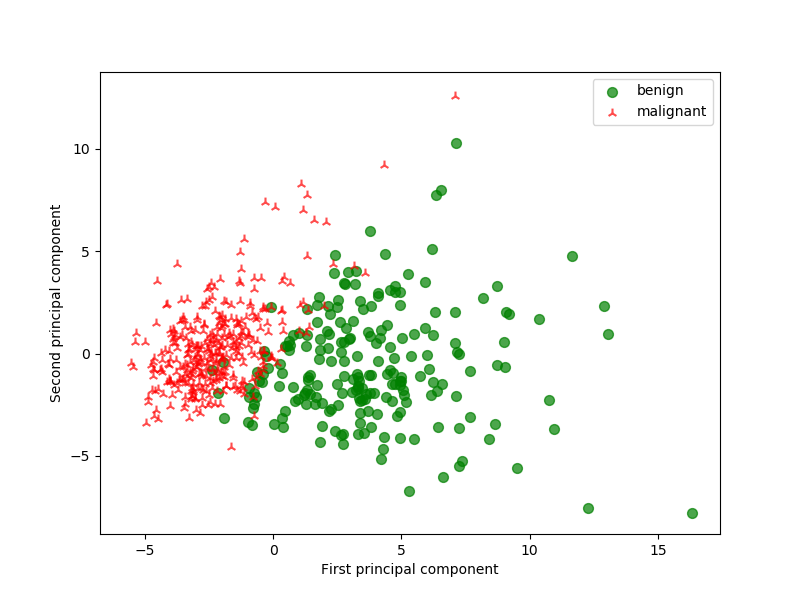

Text(0, 0.5, 'Second principal component')

In [20]:
PC1 = Z[:, 0]
PC2 = Z[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(PC1[np.where(y==0)], PC2[np.where(y==0)], s = 50, marker = "o", c = "green", alpha = 0.7)  
plt.scatter(PC1[np.where(y==1)], PC2[np.where(y==1)], s = 50, marker = "2", c = "red", alpha = 0.7) 
plt.legend(["benign", "malignant"])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [21]:
X_train, X_test, y_train, y_test  =  train_test_split(Z, y, random_state = 2019)
clf = MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes=(50,100),
    random_state = 2019,
    alpha = 0.7,
    activation = 'tanh', 
).fit(X_train, y_train)


print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))

train accuracy= 100.000%
test accuracy= 97.203%
